# System analysis

### 1) Load data from BIN files

In [1]:
### Load data from disk
import pickle
with open('aida_agdistis.bin', 'rb') as outfile:
    aida_agd_articles=pickle.load(outfile)
with open('wes2015_agdistis.bin', 'rb') as outfile:
    wes_agd_articles=pickle.load(outfile)
with open('aida_spotlight.bin', 'rb') as outfile:
    aida_spot_articles=pickle.load(outfile)
with open('wes2015_spotlight.bin', 'rb') as outfile:
    wes_spot_articles=pickle.load(outfile)
    
wes_title='wes2015'
aida_title='aida'

In [2]:
import utils
import plot_utils
import time
from collections import defaultdict

**1.1. Pick dataset**

In [3]:
articles=aida_agd_articles
skip_nils=True

### 2) Overall performance

<span style="background-color:lightgreen">Section 6.1. of the paper</span>

In [4]:
plot_utils.overall_performance(aida_agd_articles, skip_nils)

13082 27817


0.4702879534097854

### 3) Correlation between FORM frequency and accuracy

<span style="background-color:lightgreen">Section 6.2. of the paper</span>

<span style="background-color:yellow">TODO: REFACTOR</span>

**3.1. Correct and total amount per form**

In [5]:
correct_by_form = defaultdict(int)
total_by_form = defaultdict(int)
for article in articles:
    for entity in article.entity_mentions:
        if entity.sys_link and (not skip_nils or entity.gold_link!='--NME--'):
            if entity.sys_link==entity.gold_link:
                correct_by_form[entity.mention]+=1
            total_by_form[entity.mention]+=1

**3.2. Aggregate per frequency**

In [6]:
from collections import OrderedDict
agg_per_frequency=OrderedDict()
forms_by_count=defaultdict(set)
for form, count in total_by_form.items():
    str_count=str(count)
    if count not in agg_per_frequency:
        agg_per_frequency[count]={'c':0, 't':0}
    agg_per_frequency[count]['c']+=correct_by_form[form]
    agg_per_frequency[count]['t']+=count
    forms_by_count[count].add(form)
print(agg_per_frequency)

OrderedDict([(1, {'c': 1850, 't': 3491}), (2, {'c': 1257, 't': 2344}), (147, {'c': 147, 't': 147}), (48, {'c': 54, 't': 144}), (58, {'c': 0, 't': 58}), (16, {'c': 119, 't': 352}), (13, {'c': 156, 't': 455}), (4, {'c': 787, 't': 1600}), (5, {'c': 591, 't': 1160}), (109, {'c': 109, 't': 109}), (56, {'c': 38, 't': 112}), (7, {'c': 419, 't': 945}), (20, {'c': 147, 't': 320}), (10, {'c': 239, 't': 600}), (11, {'c': 192, 't': 550}), (9, {'c': 256, 't': 720}), (15, {'c': 135, 't': 375}), (18, {'c': 148, 't': 360}), (14, {'c': 106, 't': 350}), (8, {'c': 281, 't': 768}), (3, {'c': 929, 't': 1776}), (12, {'c': 210, 't': 444}), (28, {'c': 21, 't': 168}), (114, {'c': 96, 't': 114}), (143, {'c': 12, 't': 143}), (6, {'c': 517, 't': 1056}), (95, {'c': 85, 't': 95}), (149, {'c': 0, 't': 149}), (86, {'c': 31, 't': 172}), (83, {'c': 79, 't': 83}), (39, {'c': 0, 't': 78}), (24, {'c': 55, 't': 288}), (198, {'c': 144, 't': 198}), (27, {'c': 68, 't': 216}), (21, {'c': 66, 't': 126}), (25, {'c': 78, 't': 225

In [7]:
accs=OrderedDict()
for key in sorted(agg_per_frequency, reverse=True):
    acc=agg_per_frequency[key]['c']*100.0/agg_per_frequency[key]['t']
    print(key, acc, forms_by_count[key])
    accs[key]=acc

460 0.0 {'U.S.'}
236 94.91525423728814 {'Germany'}
203 70.93596059113301 {'Australia'}
198 72.72727272727273 {'France'}
176 45.45454545454545 {'England'}
167 85.62874251497006 {'Russia'}
164 0.0 {'Britain'}
160 97.5 {'Italy'}
149 0.0 {'China'}
147 100.0 {'LONDON'}
144 96.52777777777777 {'Spain'}
143 8.391608391608392 {'NEW YORK'}
132 65.15151515151516 {'Japan'}
116 67.24137931034483 {'Russian'}
114 84.21052631578948 {'German'}
109 100.0 {'Reuters'}
108 73.14814814814815 {'Sweden', 'Israel'}
103 30.097087378640776 {'Pakistan'}
98 4.081632653061225 {'Iraq'}
95 89.47368421052632 {'Belgium'}
94 80.85106382978724 {'London'}
93 46.774193548387096 {'Clinton', 'British'}
86 18.023255813953487 {'India', 'French'}
85 0.0 {'CHICAGO'}
83 95.18072289156626 {'United States'}
80 56.25 {'Israeli', 'Netherlands'}
74 83.78378378378379 {'Austria', 'Canada'}
72 83.33333333333333 {'South Africa'}
71 0.0 {'Dutch'}
70 2.857142857142857 {'European'}
69 0.0 {'World Cup'}
68 46.3235294117647 {'Czech Republic', 

**3.3. Plot frequency distribution**

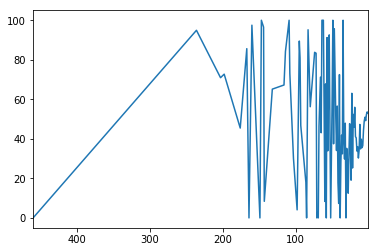

In [8]:
import matplotlib.pyplot as plt
plt.xlim(list(accs.keys())[0],list(accs.keys())[-1])
plt.plot(list(accs.keys()), list(accs.values()))
plt.show()

### 4) Correlation between instance frequency and accuracy

<span style="background-color:lightgreen">Section 6.3. of the paper</span>

<span style="background-color:yellow">TODO: REFACTOR</span>

**4.1. Correct and total amount per URI**

In [9]:
correct_by_uri = defaultdict(int)
total_by_uri = defaultdict(int)
for article in articles:
    for entity in article.entity_mentions:
        if entity.sys_link and (not skip_nils or entity.gold_link!='--NME--'):
            if entity.sys_link==entity.gold_link:
                correct_by_uri[entity.gold_link]+=1
            total_by_uri[entity.gold_link]+=1

**4.2. Aggregate per frequency**

In [10]:
from collections import OrderedDict
agg_per_frequency=OrderedDict()
uris_by_count=defaultdict(set)
for uri, count in total_by_uri.items():
    str_count=str(count)
    if count not in agg_per_frequency:
        agg_per_frequency[count]={'c':0, 't':0}
    agg_per_frequency[count]['c']+=correct_by_uri[uri]
    agg_per_frequency[count]['t']+=count
    uris_by_count[count].add(uri)
print(agg_per_frequency)

OrderedDict([(3, {'c': 723, 't': 1554}), (22, {'c': 99, 't': 176}), (234, {'c': 223, 't': 234}), (56, {'c': 104, 't': 168}), (159, {'c': 86, 't': 159}), (13, {'c': 117, 't': 299}), (2, {'c': 1057, 't': 2082}), (9, {'c': 243, 't': 711}), (110, {'c': 110, 't': 110}), (636, {'c': 121, 't': 636}), (7, {'c': 386, 't': 896}), (1, {'c': 1295, 't': 2468}), (6, {'c': 485, 't': 966}), (10, {'c': 276, 't': 720}), (12, {'c': 119, 't': 372}), (11, {'c': 270, 't': 594}), (8, {'c': 367, 't': 904}), (354, {'c': 321, 't': 354}), (42, {'c': 14, 't': 42}), (16, {'c': 134, 't': 320}), (4, {'c': 530, 't': 1412}), (14, {'c': 198, 't': 420}), (15, {'c': 119, 't': 360}), (27, {'c': 76, 't': 216}), (43, {'c': 121, 't': 172}), (5, {'c': 628, 't': 1165}), (44, {'c': 102, 't': 176}), (144, {'c': 7, 't': 144}), (18, {'c': 203, 't': 306}), (129, {'c': 125, 't': 129}), (30, {'c': 172, 't': 270}), (183, {'c': 0, 't': 183}), (100, {'c': 31, 't': 100}), (17, {'c': 114, 't': 323}), (60, {'c': 45, 't': 240}), (299, {'c':

In [11]:
accs=OrderedDict()
for key in sorted(agg_per_frequency, reverse=True):
    acc=agg_per_frequency[key]['c']*100.0/agg_per_frequency[key]['t']
    print(key, acc, uris_by_count[key])
    accs[key]=acc

636 19.0251572327044 {'United_States'}
354 90.67796610169492 {'Germany'}
308 73.37662337662337 {'Russia'}
299 48.82943143812709 {'France'}
280 2.142857142857143 {'United_Kingdom'}
234 95.2991452991453 {'London'}
215 73.02325581395348 {'Italy'}
204 92.15686274509804 {'Australia'}
194 48.96907216494845 {'Israel'}
185 3.2432432432432434 {'Iraq'}
183 0.0 {'People\\u0027s_Republic_of_China'}
178 79.21348314606742 {'Spain'}
160 31.25 {'Netherlands'}
159 54.088050314465406 {'England'}
153 56.86274509803921 {'Japan'}
144 4.861111111111111 {'New_York_City'}
129 96.89922480620154 {'Belgium'}
121 93.38842975206612 {'Sweden'}
116 94.82758620689656 {'Bill_Clinton'}
110 100.0 {'Reuters'}
109 31.65137614678899 {'Europe', 'Canada'}
102 51.96078431372549 {'Poland'}
100 31.0 {'India'}
94 67.02127659574468 {'Chechnya'}
93 30.107526881720432 {'Brazil'}
88 38.63636363636363 {'United_Nations'}
87 81.60919540229885 {'Czech_Republic'}
86 68.6046511627907 {'Austria'}
84 88.0952380952381 {'Switzerland'}
83 19.2

In [12]:
print(agg_per_frequency)

OrderedDict([(3, {'c': 723, 't': 1554}), (22, {'c': 99, 't': 176}), (234, {'c': 223, 't': 234}), (56, {'c': 104, 't': 168}), (159, {'c': 86, 't': 159}), (13, {'c': 117, 't': 299}), (2, {'c': 1057, 't': 2082}), (9, {'c': 243, 't': 711}), (110, {'c': 110, 't': 110}), (636, {'c': 121, 't': 636}), (7, {'c': 386, 't': 896}), (1, {'c': 1295, 't': 2468}), (6, {'c': 485, 't': 966}), (10, {'c': 276, 't': 720}), (12, {'c': 119, 't': 372}), (11, {'c': 270, 't': 594}), (8, {'c': 367, 't': 904}), (354, {'c': 321, 't': 354}), (42, {'c': 14, 't': 42}), (16, {'c': 134, 't': 320}), (4, {'c': 530, 't': 1412}), (14, {'c': 198, 't': 420}), (15, {'c': 119, 't': 360}), (27, {'c': 76, 't': 216}), (43, {'c': 121, 't': 172}), (5, {'c': 628, 't': 1165}), (44, {'c': 102, 't': 176}), (144, {'c': 7, 't': 144}), (18, {'c': 203, 't': 306}), (129, {'c': 125, 't': 129}), (30, {'c': 172, 't': 270}), (183, {'c': 0, 't': 183}), (100, {'c': 31, 't': 100}), (17, {'c': 114, 't': 323}), (60, {'c': 45, 't': 240}), (299, {'c':

In [13]:
list(accs.values())

[19.0251572327044,
 90.67796610169492,
 73.37662337662337,
 48.82943143812709,
 2.142857142857143,
 95.2991452991453,
 73.02325581395348,
 92.15686274509804,
 48.96907216494845,
 3.2432432432432434,
 0.0,
 79.21348314606742,
 31.25,
 54.088050314465406,
 56.86274509803921,
 4.861111111111111,
 96.89922480620154,
 93.38842975206612,
 94.82758620689656,
 100.0,
 31.65137614678899,
 51.96078431372549,
 31.0,
 67.02127659574468,
 30.107526881720432,
 38.63636363636363,
 81.60919540229885,
 68.6046511627907,
 88.0952380952381,
 19.27710843373494,
 0.0,
 50.0,
 88.31168831168831,
 61.8421052631579,
 10.95890410958904,
 0.0,
 57.971014492753625,
 97.05882352941177,
 37.121212121212125,
 20.0,
 100.0,
 71.42857142857143,
 18.75,
 62.71186440677966,
 0.0,
 0.0,
 61.904761904761905,
 92.72727272727273,
 83.33333333333333,
 67.3076923076923,
 25.49019607843137,
 0.0,
 93.87755102040816,
 25.0,
 0.0,
 47.82608695652174,
 40.0,
 57.95454545454545,
 70.34883720930233,
 33.333333333333336,
 17.073170

**4.3. Plot accuracies**

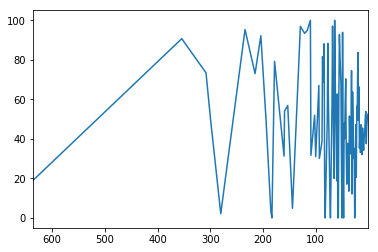

In [14]:
import matplotlib.pyplot as plt
plt.xlim(list(accs.keys())[0],list(accs.keys())[-1])
plt.plot(list(accs.keys()), list(accs.values()))
plt.show()

### 5) Correlation between instance ranks (of a form) and accuracy

<span style="background-color:lightgreen">Section 6.4. of the paper</span>


**5.1. Collect interpretations for a form**


In [15]:
interpretations=defaultdict(set)
for article in articles:
    for mention in article.entity_mentions:
        form=mention.mention
        meaning=mention.gold_link
        if not skip_nils or meaning!='--NME--':
            interpretations[form].add(meaning)

In [16]:
interpretations['Marseille']

{'Marseille', 'Olympique_de_Marseille'}

**5.2. Compute ambiguity of a form**


In [17]:
ambiguity={}
for form,meanings in interpretations.items():
    ambiguity[form]=len(meanings)
ambiguity

{'KEANE': 1,
 'MANCHESTER UNITED': 1,
 'LONDON': 1,
 'Ireland': 4,
 'Roy Keane': 1,
 'English': 3,
 'F.A. Cup': 1,
 'Manchester United': 1,
 'Roy': 1,
 'Everton': 1,
 'United': 1,
 'Alex Ferguson': 1,
 'Bratislava': 1,
 'BRATISLAVA': 1,
 'Reuters': 1,
 'American': 2,
 'Arkansas': 1,
 'LITTLE ROCK': 1,
 'Mississippi': 1,
 'Little Rock': 1,
 'Arkansas State Police': 1,
 'F.B.I.': 1,
 'Camden': 1,
 'ENGLISH': 1,
 'Stoke': 1,
 'Barnsley': 2,
 'Norwich': 1,
 'Tranmere': 1,
 'Bolton': 1,
 'Queens Park Rangers': 1,
 'Wolverhampton': 1,
 'Swindon': 1,
 'Bradford': 2,
 'Portsmouth': 2,
 'Ipswich': 1,
 'Crystal Palace': 2,
 'Port Vale': 1,
 'Birmingham': 2,
 'Reading': 2,
 'Huddersfield': 1,
 'Oxford': 3,
 'Manchester City': 1,
 'West Bromwich': 1,
 'Oldham': 2,
 'Sheffield United': 1,
 'Grimsby': 1,
 'Southend': 1,
 'Charlton': 2,
 'Plymouth': 2,
 'Brentford': 1,
 'Bury': 1,
 'Chesterfield': 3,
 'Millwall': 1,
 'Shrewsbury': 1,
 'Blackpool': 1,
 'York': 1,
 'Burnley': 1,
 'Bournemouth': 1,
 'Wa

**5.3. Aggregation per ambiguity**



In [18]:
agg_per_ambiguity=defaultdict(int)
for form, amb in ambiguity.items():
    agg_per_ambiguity[amb]+=1

In [19]:
agg_per_ambiguity

defaultdict(int, {1: 6400, 2: 359, 3: 78, 4: 29, 5: 7, 6: 3, 12: 1})

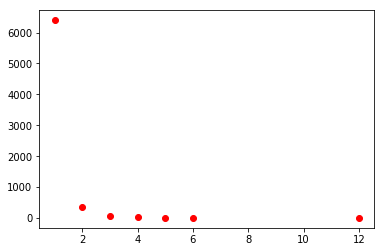

In [20]:
plt.plot(list(agg_per_ambiguity.keys()), list(agg_per_ambiguity.values()), 'ro')
plt.show()

In [21]:
sum(i for j,i in agg_per_ambiguity.items() if j>1)

477

#### AIDA: This means that there are 622 (or 477 without NILs) out of ~11k forms that have some ambiguity in the data

**5.4. Aggregate per rank**



In [22]:
correct_per_form=defaultdict(dict)
total_per_form=defaultdict(dict)
for article in articles:
    for mention in article.entity_mentions:
        form=mention.mention
        meaning=mention.gold_link
        if skip_nils and meaning=='--NME--':
            continue
        if ambiguity[form]==1:
            continue
        if meaning not in total_per_form[form]:
            total_per_form[form][meaning]=0
            correct_per_form[form][meaning]=0
        total_per_form[form][meaning]+=1
        if meaning==mention.sys_link:
            correct_per_form[form][meaning]+=1

In [23]:
len(total_per_form)

477

In [24]:
correct_per_rank, total_per_rank = plot_utils.prepare_ranks(correct_per_form, total_per_form)
print(correct_per_rank)
print(total_per_rank)

Ireland
English
American
Barnsley
Bradford
Portsmouth
Crystal Palace
Birmingham
Reading
Oxford
Oldham
Charlton
Plymouth
Chesterfield
Preston
Wigan
Cardiff
Northampton
Lincoln
Swansea
Colchester
German
Dundee
Bayer Leverkusen
Cologne
NEW YORK
Belgium
China
India
United States
JACKSONVILLE
Atlanta
France
French
Paris
Olympics
South Korea
Russian
Russia
Chechens
British
England
London
Sweden
UEFA Cup
Faroe Islands
Wales
Estonia
Belarus
Netherlands
Germany
Scotland
Latvia
Moldova
Yugoslavia
Luxembourg
Israel
Switzerland
Slovakia
Poland
Portugal
Georgia
Ukraine
Spain
Finland
Macedonia
Lithuania
Austria
Romania
Czech Republic
Northern Ireland
Italy
Cyprus
Armenia
Croatia
Bulgaria
Malta
GENOA
MILAN
Italian
Genoa
Stuttgart
Indonesia
Taiwan
Japan
New Zealand
Berlin
Bremen
Frankfurt
Hamburg
Munich
CHICAGO
Morris
California
ABC
World Cup
U.S.
Australia
Stansted
Ulsan
Liechtenstein
Republic of Ireland
Irish
South African
Chinese
TORONTO
South Africa
NORTHERN IRELAND
European
New York
MILWAUKEE
Hei

defaultdict(<class 'float'>, {1: 0.437649243831255, 2: 0.20082815734989648, 3: 0.08487084870848709, 4: 0.013333333333333334, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0})


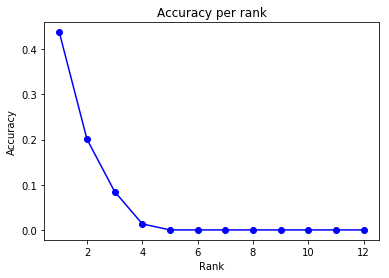

In [25]:
plot_utils.plot_ranks(correct_per_rank, total_per_rank)

### 6) Ranks of the top-N most frequent forms

<span style="background-color:lightgreen">Section 6.5. of the paper</span>


In [31]:
# Top 10 have form frequency of >135

min_frequency=135
correct_per_rank, total_per_rank = plot_utils.prepare_ranks(correct_per_form, total_per_form, min_frequency=min_frequency)
print(correct_per_rank)
print(total_per_rank)

NEW YORK
China
France
Russia
England
Germany
Spain
Italy
U.S.
Australia
defaultdict(<class 'int'>, {1: 1030, 2: 0, 3: 12, 4: 0, 5: 0, 6: 0})
defaultdict(<class 'int'>, {1: 1798, 2: 175, 3: 38, 4: 20, 5: 4, 6: 1})


defaultdict(<class 'float'>, {1: 0.5728587319243604, 2: 0.0, 3: 0.3157894736842105, 4: 0.0, 5: 0.0, 6: 0.0})


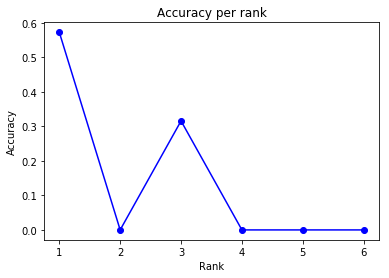

In [32]:
plot_utils.plot_ranks(correct_per_rank, total_per_rank)

### 7) PageRank analysis

<span style="background-color:lightgreen">Section 6.6. of the paper</span>

<span style="background-color:red">TODO: IMPLEMENT</span>

### 8) Notes

* connectivity should reflect popularity -> try pageRank
* this is the hardest part of the EL task
* sometimes nils are most frequent
* NILs - maybe set them aside
* very basic baseline - throw away dbpedia, randomly assign from the training data - build this baseline
* always try the most frequent one
* popular, transparent, and the best one - distinguish between open source systems
* look at coreference too (noun phrases and pronouns)
* annotation or not of coreferential expressions (we can also just use them in a solution)? 

#### Summary of the todos:
* Another system or 2 (spotlight) - PIEK: take popular, transparent, and the best one
* More datasets
* NIL entities
* Baseline
* Coreference